## 构建模型的3种方法
可以使用以下3种方式构建模型：使用Sequential按层顺序构建模型，使用函数式API构建任意结构模型，继承Model基类构建自定义模型。

对于顺序结构的模型，优先使用Sequential方法构建。

如果模型有多输入或者多输出，或者模型需要共享权重，或者模型具有残差连接等非顺序结构，推荐使用函数式API进行创建。

如果无特定必要，尽可能避免使用Model子类化的方式构建模型，这种方式提供了极大的灵活性，但也有更大的概率出错。

In [1]:
import tensorflow as tf
import numpy as np

2024-04-22 12:02:56.636161: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
MAX_WORDS = 1000  # We will only consider the top 10,000 words in the dataset
MAX_LEN = 50  # We will cut reviews after 200 words
BATCH_SIZE = 20 

In [28]:
x = np.random.randint(0,MAX_WORDS, size=(100,MAX_LEN))
y = np.random.randint(0,2, size=(100,))
y

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1])

## 一 Sequential按层顺序创建模型

In [29]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(MAX_WORDS,7))
model.add(tf.keras.layers.Conv1D(filters = 64,kernel_size = 5,activation = "relu"))
model.add(tf.keras.layers.MaxPool1D(2))
model.add(tf.keras.layers.Conv1D(filters = 32,kernel_size = 3,activation = "relu"))
model.add(tf.keras.layers.MaxPool1D(2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1,activation = "sigmoid"))

model.compile(optimizer='Nadam',
            loss='binary_crossentropy',
            metrics=['accuracy',"AUC"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
import datetime
logdir = "./data/keras_model/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
history = model.fit(x,y,validation_split = 0.2,epochs = 6,callbacks=[tensorboard_callback])

Epoch 1/6


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 412ms/step - AUC: 0.4828 - accuracy: 0.4242 - loss: 0.6939 - val_AUC: 0.3535 - val_accuracy: 0.4500 - val_loss: 0.6943
Epoch 2/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - AUC: 0.8754 - accuracy: 0.7016 - loss: 0.6884 - val_AUC: 0.3889 - val_accuracy: 0.5000 - val_loss: 0.6941
Epoch 3/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - AUC: 0.9737 - accuracy: 0.7195 - loss: 0.6845 - val_AUC: 0.3384 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 4/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - AUC: 0.9952 - accuracy: 0.9641 - loss: 0.6810 - val_AUC: 0.3434 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 5/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - AUC: 1.0000 - accuracy: 0.9258 - loss: 0.6760 - val_AUC: 0.3333 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 6/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - AUC: 1.0000 - accuracy: 0.9820 - loss: 0.6712 - val_AUC: 0.3131 - val_accuracy: 0.5000 - val_loss: 0.6947


In [32]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

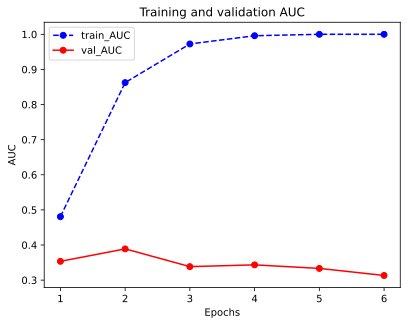

In [33]:
plot_metric(history,"AUC")

## 二，函数式API创建任意结构模型

In [36]:
tf.keras.backend.clear_session()

inputs = tf.keras.Input(shape=[MAX_LEN])
emb  = tf.keras.layers.Embedding(MAX_WORDS,20)(inputs)

branch1 = tf.keras.layers.SeparableConv1D(64,3,activation="relu")(emb)
branch1 = tf.keras.layers.MaxPool1D(3)(branch1)
branch1 = tf.keras.layers.SeparableConv1D(32,3,activation="relu")(branch1)
branch1 = tf.keras.layers.GlobalMaxPool1D()(branch1)

branch2 = tf.keras.layers.SeparableConv1D(64,5,activation="relu")(emb)
branch2 = tf.keras.layers.MaxPool1D(5)(branch2)
branch2 = tf.keras.layers.SeparableConv1D(32,5,activation="relu")(branch2)
branch2 = tf.keras.layers.GlobalMaxPool1D()(branch2)

branch3 = tf.keras.layers.SeparableConv1D(64,7,activation="relu")(emb)
branch3 = tf.keras.layers.MaxPool1D(5)(branch3)
branch3 = tf.keras.layers.SeparableConv1D(32,7,activation="relu")(branch3)
branch3 = tf.keras.layers.GlobalMaxPool1D()(branch3)

concat = tf.keras.layers.Concatenate()([branch1,branch2,branch3])
outputs = tf.keras.layers.Dense(1,activation = "sigmoid")(concat)

model = tf.keras.Model(inputs = inputs,outputs = outputs)

model.compile(optimizer='Nadam',
            loss='binary_crossentropy',
            metrics=['accuracy',"AUC"])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 20)    │     20,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv1d    │ (None, 48, 64)    │      1,404 │ embedding[0][0]   │
│ (SeparableConv1D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv1d_2  │ (None, 46, 64)    │      1,444 │ embedding[0][0]   │
│ (SeparableConv1D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv1d_4  │ (None, 44, 64)    │      1,484 │ embedding[0][0]   │
│ (SeparableConv1D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 16, 64)    │          0 │ separable_conv1d… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 9, 64)     │          0 │ separable_conv1d… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 8, 64)     │          0 │ separable_conv1d… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv1d_1  │ (None, 14, 32)    │      2,272 │ max_pooling1d[0]… │
│ (SeparableConv1D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv1d_3  │ (None, 5, 32)     │      2,400 │ max_pooling1d_1[… │
│ (SeparableConv1D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv1d_5  │ (None, 2, 32)     │      2,528 │ max_pooling1d_2[… │
│ (SeparableConv1D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 32)        │          0 │ separable_conv1d… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 32)        │          0 │ separable_conv1d… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 32)        │          0 │ separable_conv1d… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 96)        │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │         97 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 31,629 (123.55 KB)

 Trainable params: 31,629 (123.55 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
import datetime
logdir = "./data/keras_model/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
try:
    history = model.fit(x,y, validation_split=0.3, epochs = 6, callbacks=[tensorboard_callback])
except Exception as e:
    print(e)

Epoch 1/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 516ms/step - AUC: 0.5043 - accuracy: 0.5150 - loss: 0.6935 - val_AUC: 0.4583 - val_accuracy: 0.4000 - val_loss: 0.6942
Epoch 2/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - AUC: 0.7290 - accuracy: 0.5416 - loss: 0.6926 - val_AUC: 0.5000 - val_accuracy: 0.4000 - val_loss: 0.6936
Epoch 3/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - AUC: 0.5000 - accuracy: 0.6170 - loss: 0.6924 - val_AUC: 0.5000 - val_accuracy: 0.4000 - val_loss: 0.6938
Epoch 4/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - AUC: 0.5910 - accuracy: 0.6391 - loss: 0.6919 - val_AUC: 0.5000 - val_accuracy: 0.4000 - val_loss: 0.6940
Epoch 5/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - AUC: 0.9566 - accuracy: 0.5260 - loss: 0.6915 - val_AUC: 0.5000 - val_accuracy: 0.4000 - val_loss: 0.6937
Epoch 6/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - AUC: 0.6777 - accuracy: 0.7600 - loss: 0.6905 - val_AUC: 0.5000 - val_accuracy: 0.4000 - val_loss: 0.6947


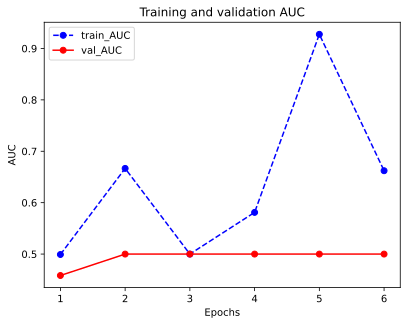

In [38]:
plot_metric(history,"AUC")

## 三，Model子类化创建自定义模型

In [39]:
# 自定义模型，实际上也可以使用Sequential或者FunctionalAPI
# 先自定义一个残差模块，为自定义Layer

class ResBlock(tf.keras.Layer):
    def __init__(self, kernel_size, **kwargs):
        super(ResBlock, self).__init__(**kwargs)
        self.kernel_size = kernel_size
        
    def build(self,input_shape):
        self.conv1 = tf.keras.layers.Conv1D(filters=64,kernel_size=self.kernel_size,
                                   activation = "relu",padding="same")
        self.conv2 = tf.keras.layers.Conv1D(filters=32,kernel_size=self.kernel_size,
                                   activation = "relu",padding="same")
        self.conv3 = tf.keras.layers.Conv1D(filters=input_shape[-1],
                                   kernel_size=self.kernel_size,activation = "relu",padding="same")
        self.maxpool = tf.keras.layers.MaxPool1D(2)
        super(ResBlock,self).build(input_shape) # 相当于设置self.built = True

    
    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.conv2(x)
        x = self.conv3(x)
        x = tf.keras.layers.Add()([inputs,x])
        x = self.maxpool(x)
        return x
    
    #如果要让自定义的Layer通过Functional API 组合成模型时可以序列化，需要自定义get_config方法。
    def get_config(self):  
        config = super(ResBlock, self).get_config()
        config.update({'kernel_size': self.kernel_size})
        return config
    


In [41]:
# 测试ResBlock
resblock = ResBlock(kernel_size = 3)
resblock.build(input_shape = (None,200,7))
#resblock.compute_output_shape(input_shape=(None,200,7))

In [42]:
# 自定义模型，实际上也可以使用Sequential或者FunctionalAPI

class ImdbModel(tf.keras.Model):
    def __init__(self):
        super(ImdbModel, self).__init__()
        
    def build(self,input_shape):
        self.embedding = tf.keras.layers.Embedding(MAX_WORDS,7)
        self.block1 = ResBlock(7)
        self.block2 = ResBlock(5)
        self.dense = tf.keras.layers.Dense(1,activation = "sigmoid")
        super(ImdbModel,self).build(input_shape)
    
    def call(self, x):
        x = self.embedding(x)
        x = self.block1(x)
        x = self.block2(x)
        x = tf.keras.layers.Flatten()(x)
        x = self.dense(x)
        return(x)


In [45]:
model = ImdbModel()
#model.build(input_shape =(None,200))
model.summary()

model.compile(optimizer='Nadam',
            loss='binary_crossentropy',
            metrics=['accuracy',"AUC"])

Model: "imdb_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
import datetime

logdir = "./tflogs/keras_model/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
history = model.fit(x,y,validation_split=0.3, epochs = 6,callbacks=[tensorboard_callback])

Epoch 1/6


3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - AUC: 0.4651 - accuracy: 0.4818 - loss: 0.6962 - val_AUC: 0.4167 - val_accuracy: 0.4333 - val_loss: 0.6945
Epoch 2/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - AUC: 0.8084 - accuracy: 0.6912 - loss: 0.6861 - val_AUC: 0.3889 - val_accuracy: 0.3667 - val_loss: 0.6978
Epoch 3/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - AUC: 0.9559 - accuracy: 0.8290 - loss: 0.6789 - val_AUC: 0.4120 - val_accuracy: 0.4000 - val_loss: 0.6988
Epoch 4/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - AUC: 0.9816 - accuracy: 0.8647 - loss: 0.6707 - val_AUC: 0.3889 - val_accuracy: 0.4000 - val_loss: 0.7044
Epoch 5/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - AUC: 0.9984 - accuracy: 0.6866 - loss: 0.6625 - val_AUC: 0.3565 - val_accuracy: 0.4000 - val_loss: 0.7075
Epoch 6/6
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - AUC: 1.0000 - accuracy: 0.7276 - loss: 0.6471 - val_AUC: 0.3611 - val_accuracy: 0.4000 - val_loss: 0.7171
